In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipynb.fs.full.data_loading import get_usable_data

In [3]:
data = get_usable_data()

In [4]:
data.head()

,filename,label,audio_data,audio_sr,chroma_stft_mean,chroma_stft_stdev,chroma_stft_var,rms_mean,rms_stdev,rms_var,...,mfccs_17_var,mfccs_18_mean,mfccs_18_stdev,mfccs_18_var,mfccs_19_mean,mfccs_19_stdev,mfccs_19_var,mfccs_20_mean,mfccs_20_stdev,mfccs_20_var
0,blues.00000.wav,blues,"[0.0073242188, 0.016601562, 0.0076293945, -0.0...",22050,0.350129,0.297946,0.088772,0.130184,0.053183,0.002828,...,36.535866,-0.408730,6.450052,41.603168,-2.302677,7.419815,55.053650,1.222467,6.851376,46.941349
1,blues.00001.wav,blues,"[0.0034179688, 0.0043029785, 0.001373291, 0.00...",22050,0.340849,0.308182,0.094976,0.095908,0.048711,0.002373,...,60.231415,0.296872,6.937811,48.133217,-0.282430,7.148847,51.106014,0.530644,6.766735,45.788700
2,blues.00002.wav,blues,"[0.019012451, 0.047698975, 0.029418945, -0.018...",22050,0.363538,0.291987,0.085257,0.175473,0.052449,0.002751,...,47.629646,-1.819024,7.238342,52.393597,-3.440458,6.829597,46.643394,-2.238128,5.536529,30.653151
3,blues.00003.wav,blues,"[-0.013000488, -0.03060913, -0.036071777, -0.0...",22050,0.404854,0.306592,0.093999,0.141040,0.079672,0.006348,...,50.218452,0.636311,6.109478,37.325726,-0.615968,6.103915,37.257774,-3.405046,5.653782,31.965254
4,blues.00004.wav,blues,"[-0.0063171387, -0.009277344, -0.008331299, -0...",22050,0.308526,0.296383,0.087843,0.091501,0.048013,0.002305,...,75.276741,-0.915952,7.323472,53.633236,-4.408018,7.929848,62.882492,-11.704385,7.429014,55.190254


In [5]:
def label_to_id(label):
    if label == "blues":
        return 0
    elif label == "classical":
        return 1
    elif label == "country":
        return 2
    elif label == "disco":
        return 3
    elif label == "hiphop":
        return 4
    elif label == "jazz":
        return 5
    elif label == "metal":
        return 6
    elif label == "pop":
        return 7
    elif label == "reggae":
        return 8
    elif label == "rock":
        return 9
    else:
        print(label)
        return -1
    
def label_to_color(label):
    if label == "blues":
        return '#e6194b'
    elif label == "classical":
        return '#ffe119'
    elif label == "country":
        return '#f58231'
    elif label == "disco":
        return '#46f0f0'
    elif label == "hiphop":
        return '#bcf60c'
    elif label == "jazz":
        return '#008080'
    elif label == "metal":
        return '#9a6324'
    elif label == "pop":
        return '#800000'
    elif label == "reggae":
        return '#808000'
    elif label == "rock":
        return '#000075'
    else:
        print(label)
        return '#000000'

In [6]:
new_data = data.copy()

for index, row in new_data.iterrows():
    cluster = label_to_id(str(row['label']))
    new_data.at[index, 'cluster'] = cluster
    color = label_to_color(str(row['label']))
    new_data.at[index, 'c']= color
    
#new_data.head()

In [7]:
#Blues

In [8]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='classical')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['rms_mean' 'mfccs_6_mean']


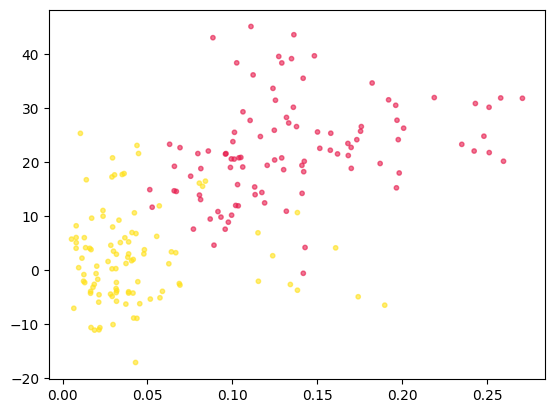

In [9]:
plt.scatter(new_data_2genre.rms_mean, new_data_2genre.mfccs_6_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [10]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='country')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['rms_var' 'mfccs_6_mean']


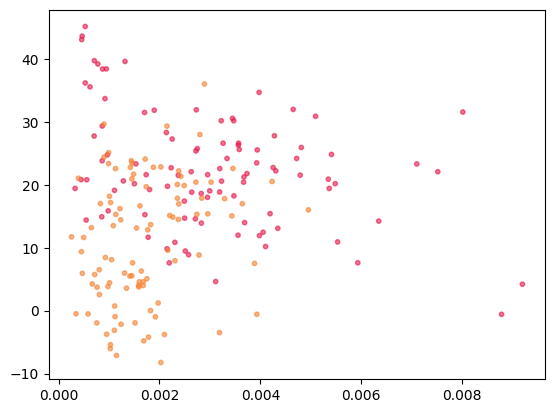

In [11]:
plt.scatter(new_data_2genre.rms_var, new_data_2genre.mfccs_6_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [12]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='disco')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_centroid_mean' 'rolloff_mean']


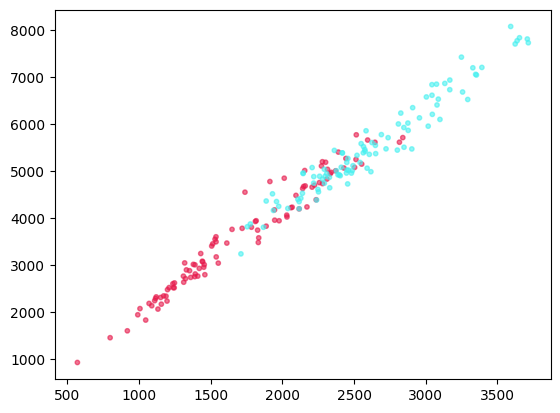

In [13]:
plt.scatter(new_data_2genre.spectral_centroid_mean, new_data_2genre.rolloff_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [14]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='hiphop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'spectral_bandwidth_mean']


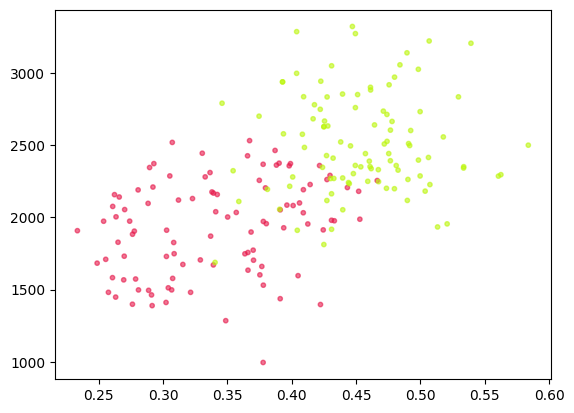

In [15]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.spectral_bandwidth_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [16]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='jazz')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_6_mean' 'mfccs_17_mean']


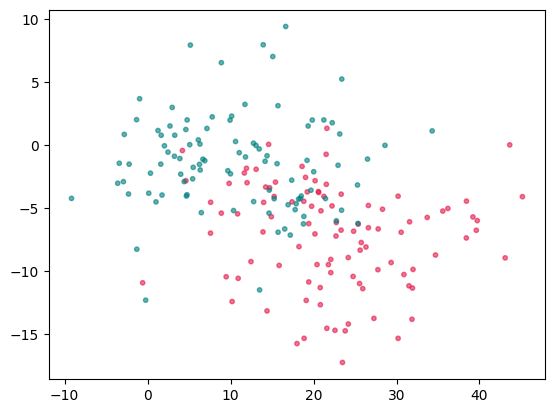

In [17]:
plt.scatter(new_data_2genre.mfccs_6_mean, new_data_2genre.mfccs_17_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [18]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='metal')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'chroma_stft_var']


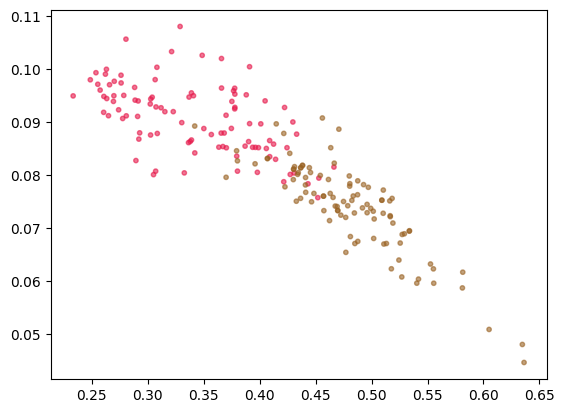

In [19]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.chroma_stft_var, c=new_data_2genre.c, alpha = 0.6, s=10)

In [20]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_bandwidth_mean' 'mfccs_9_mean']


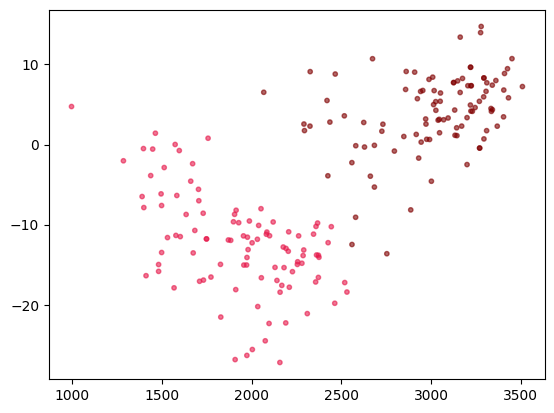

In [21]:
plt.scatter(new_data_2genre.spectral_bandwidth_mean, new_data_2genre.mfccs_9_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [22]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_centroid_stdev' 'mfccs_9_mean']


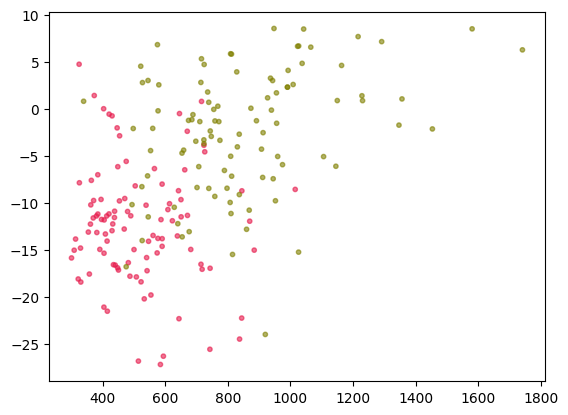

In [23]:
plt.scatter(new_data_2genre.spectral_centroid_stdev, new_data_2genre.mfccs_9_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [24]:
new_data_2genre = new_data[(new_data.label=='blues') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_stdev' 'chroma_stft_var']


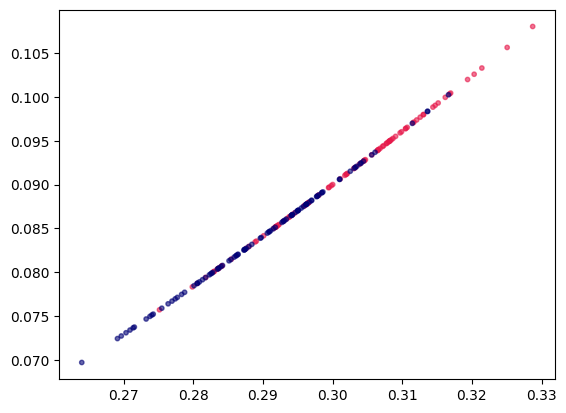

In [25]:
plt.scatter(new_data_2genre.chroma_stft_stdev, new_data_2genre.chroma_stft_var, c=new_data_2genre.c, alpha = 0.6, s=10)

In [26]:
#Classical

In [27]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='country')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['rms_mean' 'mfccs_1_mean']


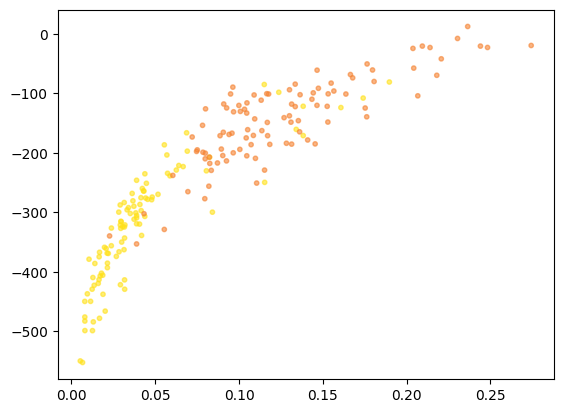

In [28]:
plt.scatter(new_data_2genre.rms_mean, new_data_2genre.mfccs_1_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [29]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='disco')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'rolloff_mean']


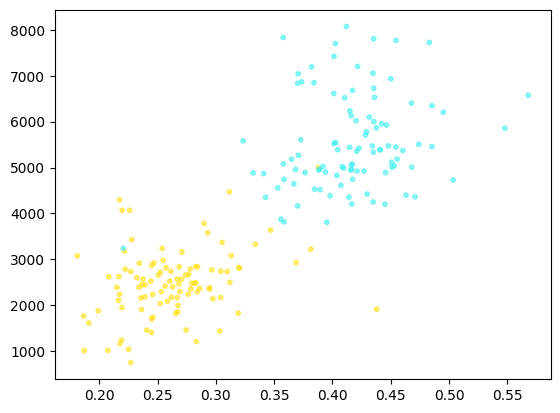

In [30]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.rolloff_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [31]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='hiphop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'spectral_bandwidth_mean']


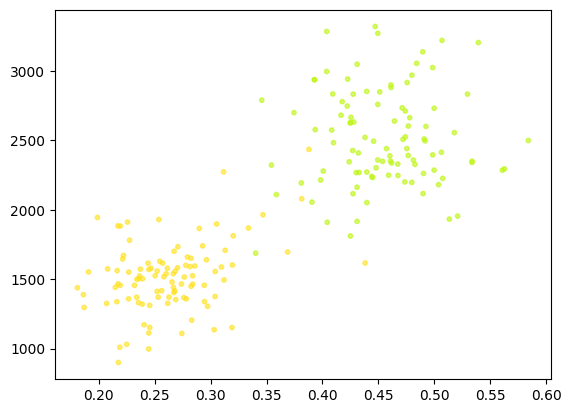

In [32]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.spectral_bandwidth_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [33]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='jazz')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_stdev' 'rolloff_stdev']


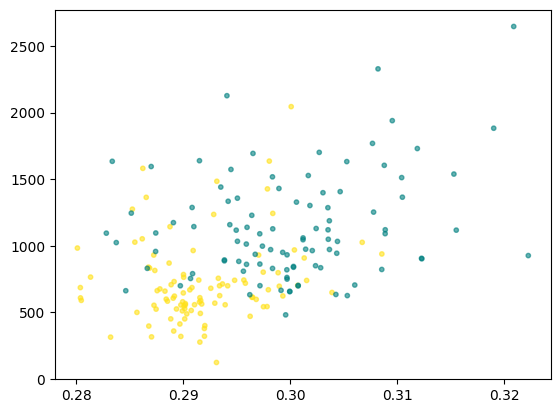

In [34]:
plt.scatter(new_data_2genre.chroma_stft_stdev, new_data_2genre.rolloff_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [35]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='metal')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'rolloff_mean']


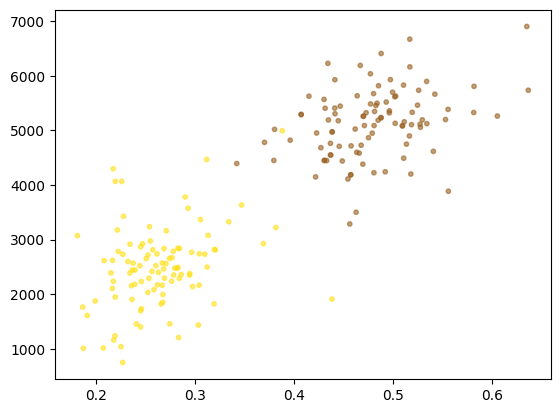

In [36]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.rolloff_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [37]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_bandwidth_mean' 'rolloff_mean']


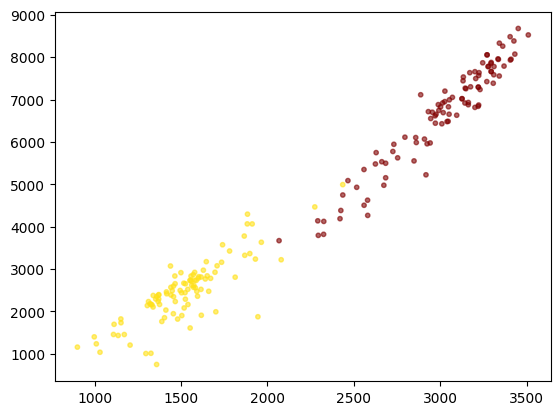

In [38]:
plt.scatter(new_data_2genre.spectral_bandwidth_mean, new_data_2genre.rolloff_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [39]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'spectral_centroid_stdev']


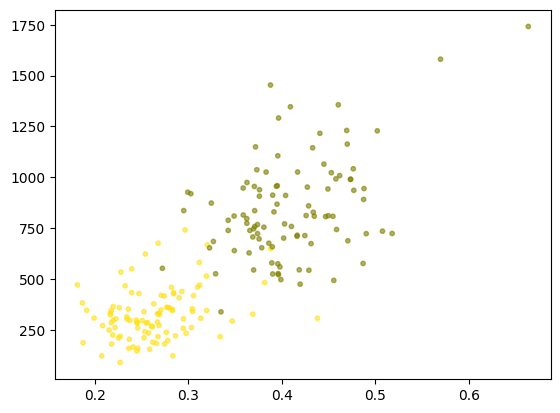

In [40]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.spectral_centroid_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [41]:
new_data_2genre = new_data[(new_data.label=='classical') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_1_mean']


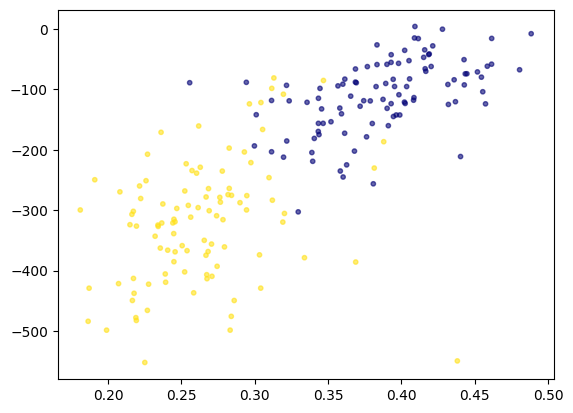

In [42]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_1_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [43]:
#country

In [44]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='disco')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'zero_crossing_rate_mean']


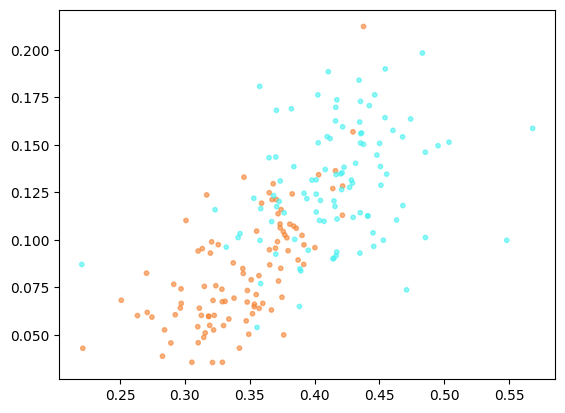

In [45]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.zero_crossing_rate_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [46]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='hiphop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'zero_crossing_rate_stdev']


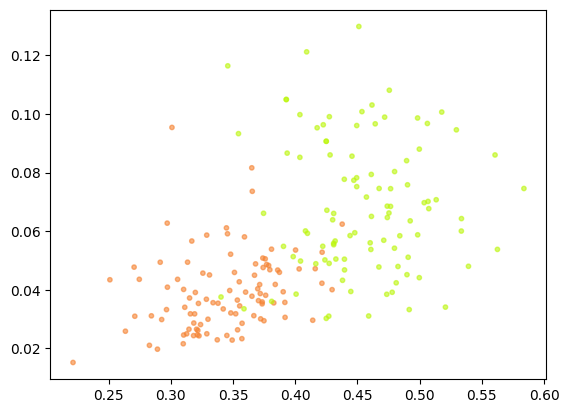

In [47]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.zero_crossing_rate_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [48]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='jazz')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_6_stdev']


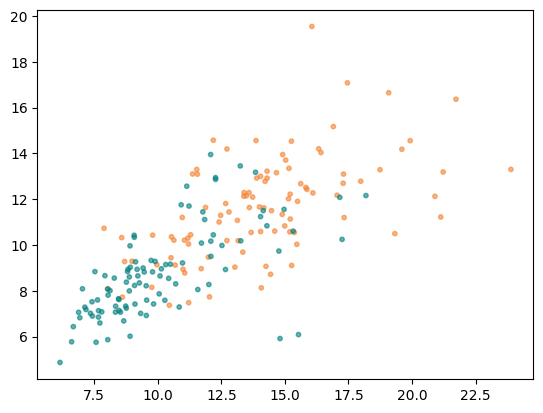

In [49]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_6_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [50]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='metal')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_12_mean']


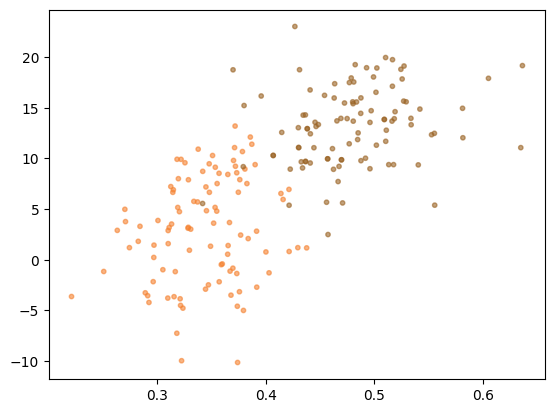

In [51]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_12_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [52]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_bandwidth_mean' 'mfccs_9_mean']


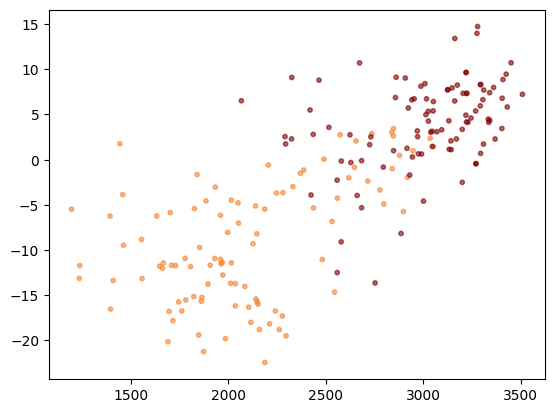

In [53]:
plt.scatter(new_data_2genre.spectral_bandwidth_mean, new_data_2genre.mfccs_9_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [54]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_3_stdev']


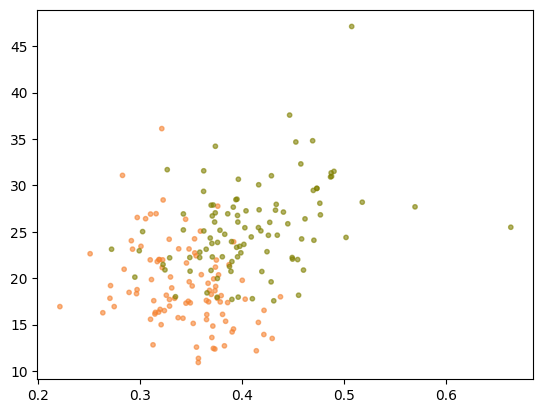

In [55]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_3_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [56]:
new_data_2genre = new_data[(new_data.label=='country') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_10_stdev']


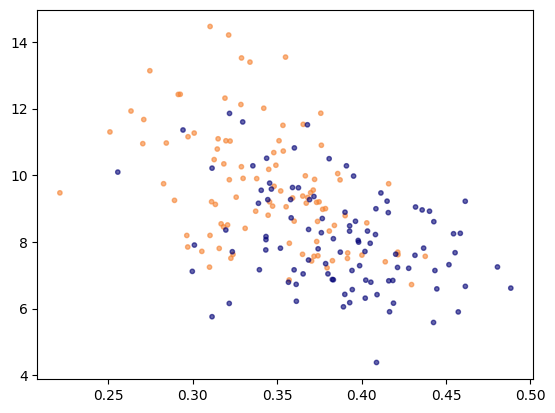

In [57]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_10_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [58]:
#Disco

In [59]:
new_data_2genre = new_data[(new_data.label=='disco') | (new_data.label=='hiphop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_5_var']


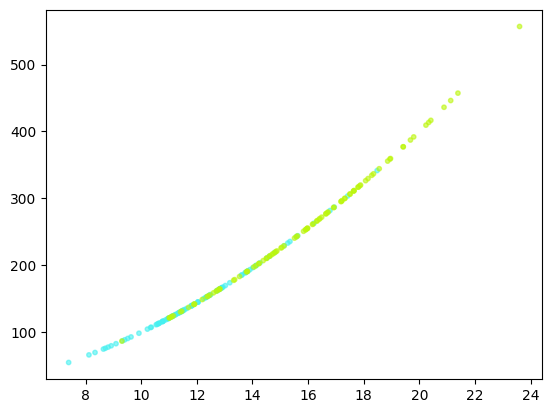

In [60]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_5_var, c=new_data_2genre.c, alpha = 0.6, s=10)

In [61]:
new_data_2genre = new_data[(new_data.label=='disco') | (new_data.label=='jazz')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_1_mean']


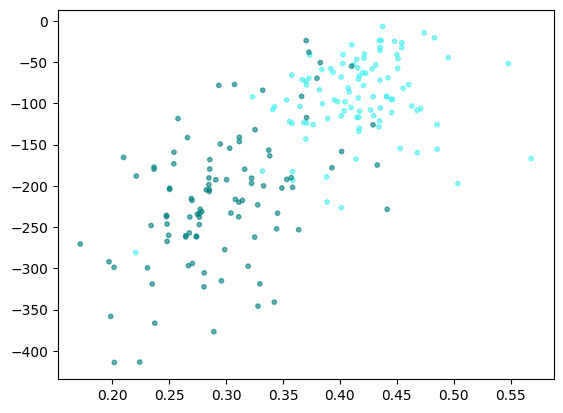

In [62]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_1_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [63]:
new_data_2genre = new_data[(new_data.label=='disco') | (new_data.label=='metal')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_centroid_stdev' 'mfccs_4_mean']


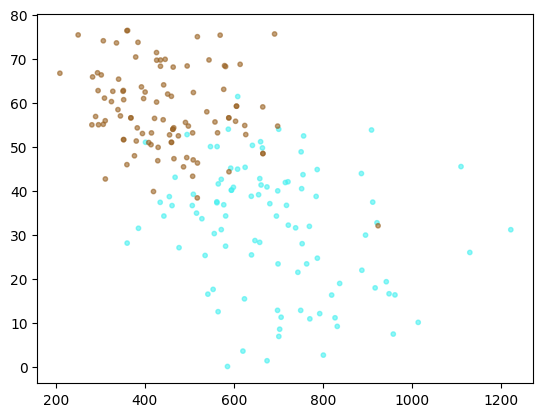

In [64]:
plt.scatter(new_data_2genre.spectral_centroid_stdev, new_data_2genre.mfccs_4_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [65]:
new_data_2genre = new_data[(new_data.label=='disco') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_7_mean' 'mfccs_9_mean']


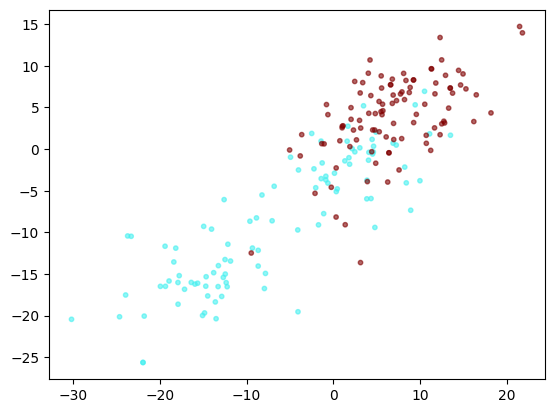

In [66]:
plt.scatter(new_data_2genre.mfccs_7_mean, new_data_2genre.mfccs_9_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [67]:
new_data_2genre = new_data[(new_data.label=='disco') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_7_stdev']


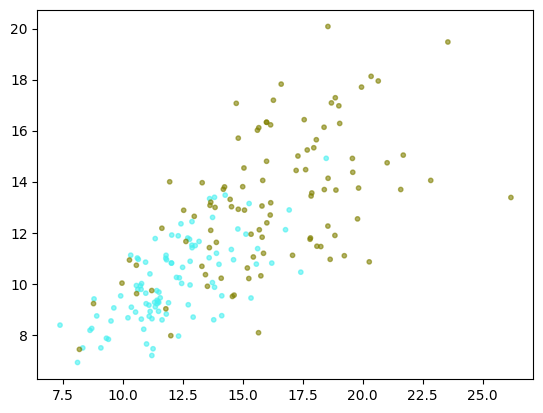

In [68]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_7_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [69]:
new_data_2genre = new_data[(new_data.label=='disco') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['rms_stdev' 'rolloff_mean']


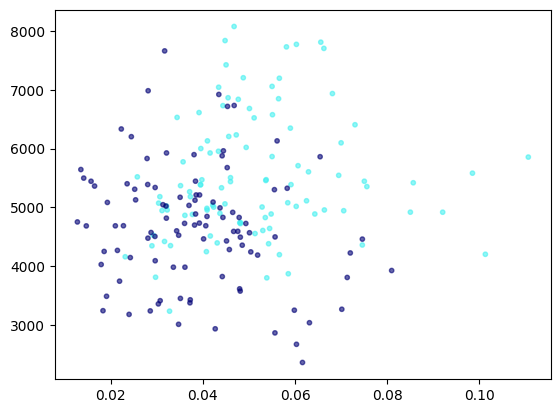

In [70]:
plt.scatter(new_data_2genre.rms_stdev, new_data_2genre.rolloff_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [71]:
# Hiphop

In [72]:
new_data_2genre = new_data[(new_data.label=='hiphop') | (new_data.label=='jazz')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_5_stdev']


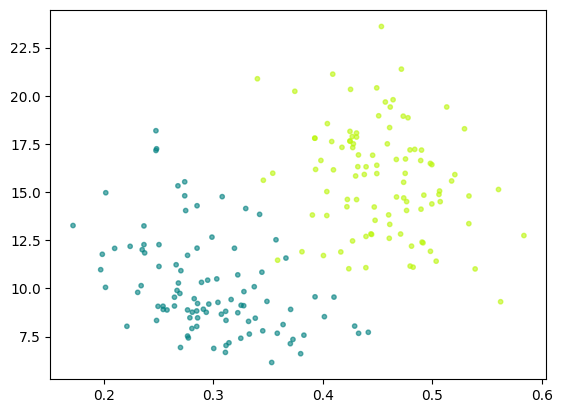

In [73]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_5_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [74]:
new_data_2genre = new_data[(new_data.label=='hiphop') | (new_data.label=='metal')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_5_var']


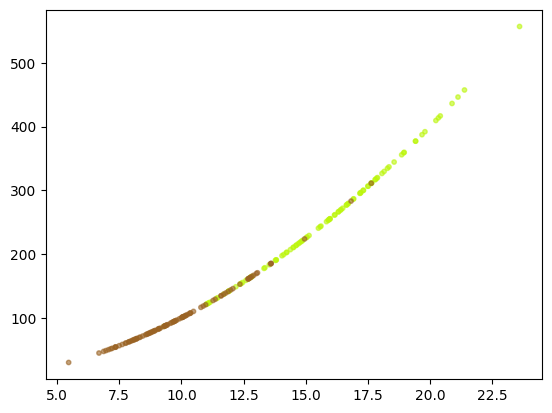

In [75]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_5_var, c=new_data_2genre.c, alpha = 0.6, s=10)

In [76]:
new_data_2genre = new_data[(new_data.label=='hiphop') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_bandwidth_mean' 'mfccs_4_mean']


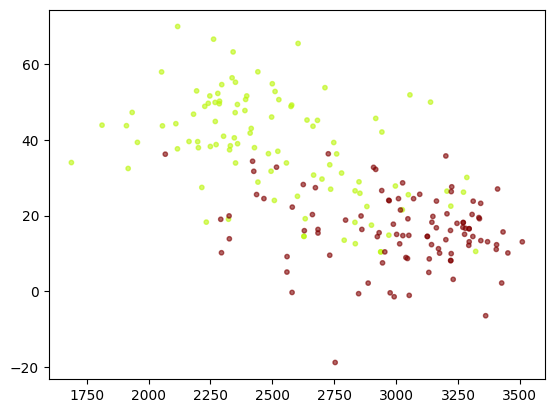

In [77]:
plt.scatter(new_data_2genre.spectral_bandwidth_mean, new_data_2genre.mfccs_4_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [78]:
new_data_2genre = new_data[(new_data.label=='hiphop') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['rms_mean' 'mfccs_1_mean']


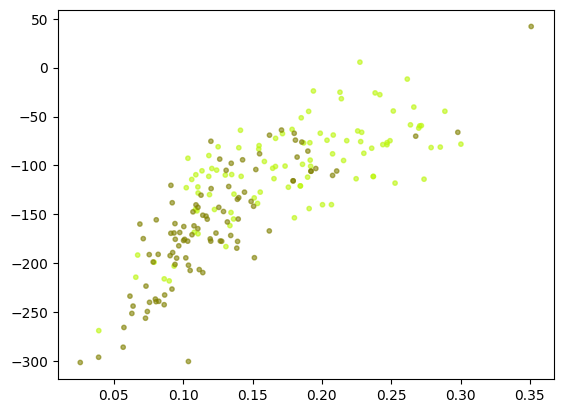

In [79]:
plt.scatter(new_data_2genre.rms_mean, new_data_2genre.mfccs_1_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [80]:
new_data_2genre = new_data[(new_data.label=='hiphop') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_5_var']


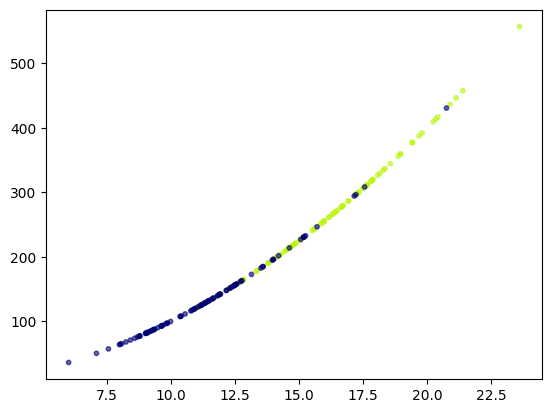

In [81]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_5_var, c=new_data_2genre.c, alpha = 0.6, s=10)

In [82]:
# Jazz

In [83]:
new_data_2genre = new_data[(new_data.label=='jazz') | (new_data.label=='metal')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_8_mean']


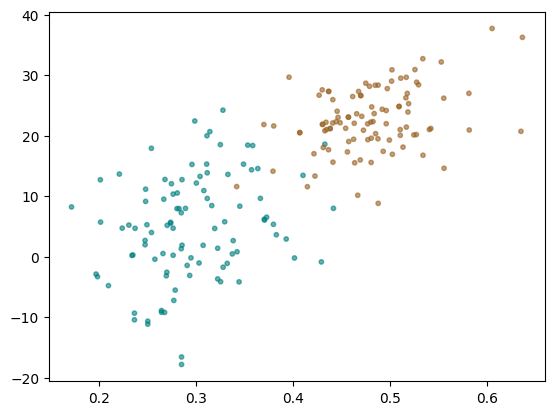

In [84]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_8_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [85]:
new_data_2genre = new_data[(new_data.label=='jazz') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_centroid_stdev' 'mfccs_1_mean']


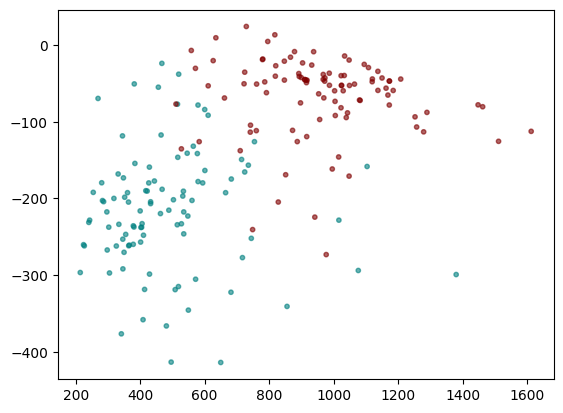

In [86]:
plt.scatter(new_data_2genre.spectral_centroid_stdev, new_data_2genre.mfccs_1_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [87]:
new_data_2genre = new_data[(new_data.label=='jazz') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_7_stdev']


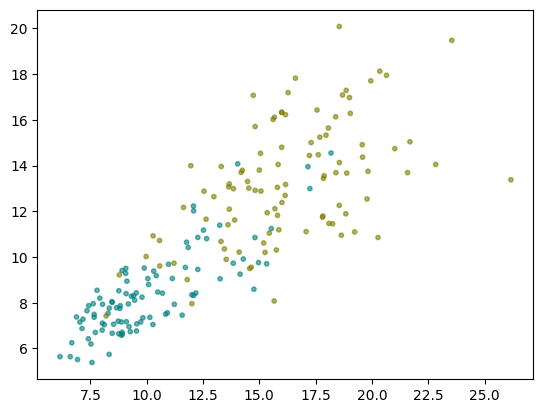

In [88]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_7_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [89]:
new_data_2genre = new_data[(new_data.label=='jazz') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_1_mean']


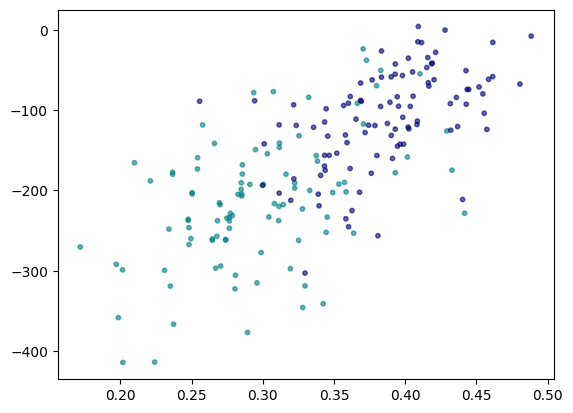

In [90]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_1_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [91]:
# metal

In [92]:
new_data_2genre = new_data[(new_data.label=='metal') | (new_data.label=='pop')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_4_mean' 'mfccs_8_mean']


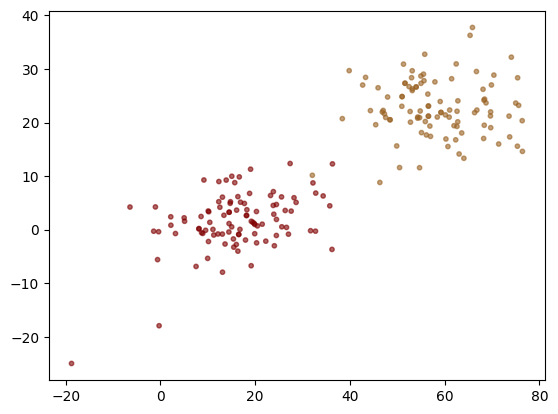

In [93]:
plt.scatter(new_data_2genre.mfccs_4_mean, new_data_2genre.mfccs_8_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [94]:
new_data_2genre = new_data[(new_data.label=='metal') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['rolloff_stdev' 'mfccs_5_stdev']


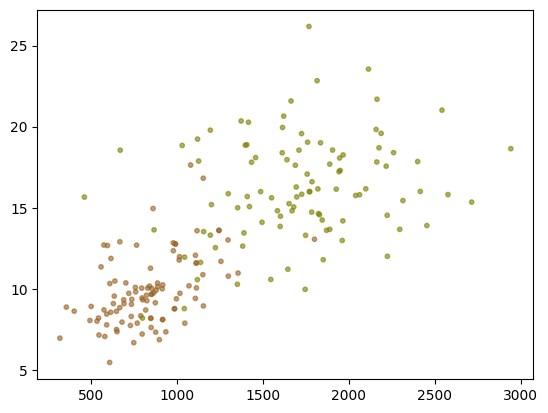

In [95]:
plt.scatter(new_data_2genre.rolloff_stdev, new_data_2genre.mfccs_5_stdev, c=new_data_2genre.c, alpha = 0.6, s=10)

In [96]:
new_data_2genre = new_data[(new_data.label=='metal') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['chroma_stft_mean' 'mfccs_12_mean']


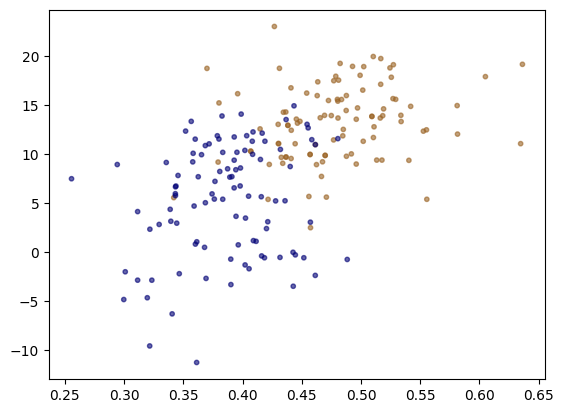

In [97]:
plt.scatter(new_data_2genre.chroma_stft_mean, new_data_2genre.mfccs_12_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [98]:
# pop

In [99]:
new_data_2genre = new_data[(new_data.label=='pop') | (new_data.label=='reggae')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_bandwidth_mean' 'rolloff_mean']


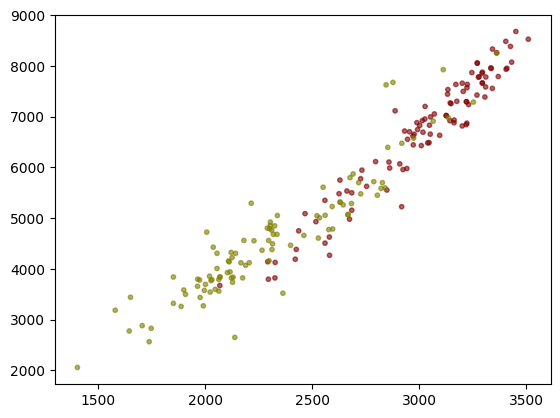

In [100]:
plt.scatter(new_data_2genre.spectral_bandwidth_mean, new_data_2genre.rolloff_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [101]:
new_data_2genre = new_data[(new_data.label=='pop') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['spectral_bandwidth_mean' 'mfccs_9_mean']


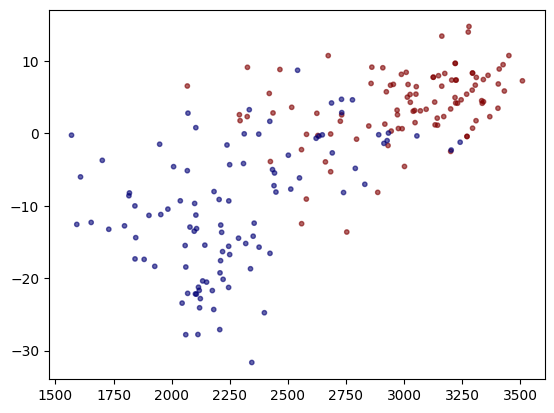

In [102]:
plt.scatter(new_data_2genre.spectral_bandwidth_mean, new_data_2genre.mfccs_9_mean, c=new_data_2genre.c, alpha = 0.6, s=10)

In [103]:
# reggae

In [104]:
new_data_2genre = new_data[(new_data.label=='reggae') | (new_data.label=='rock')]

fs = SelectKBest(f_classif, k=2)
y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr', 'c', 'cluster'],axis=1)
fs.fit_transform(X,y)
print(np.array(X.keys()[fs.get_support()]))

['mfccs_5_stdev' 'mfccs_5_var']


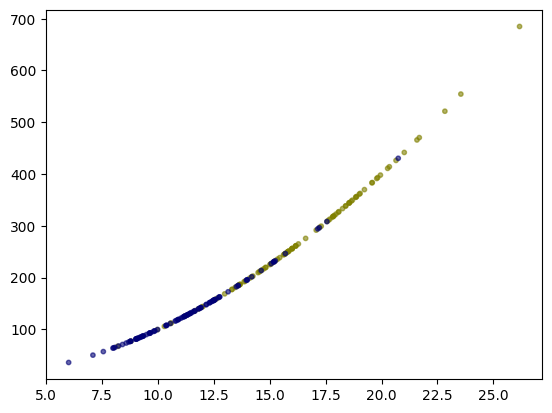

In [105]:
plt.scatter(new_data_2genre.mfccs_5_stdev, new_data_2genre.mfccs_5_var, c=new_data_2genre.c, alpha = 0.6, s=10)